Flip image


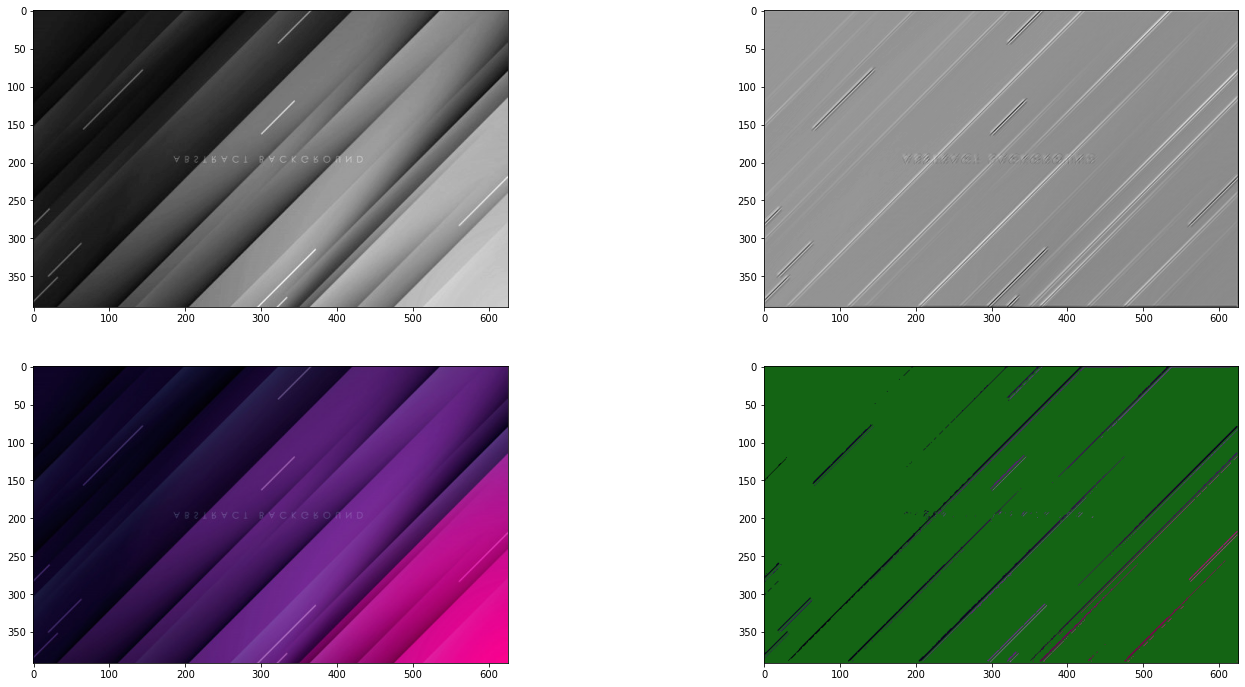

In [97]:
#!/usr/bin/env python
# coding: utf-8

import argparse, sys

parser = argparse.ArgumentParser(
    usage=' /path/to/input/file [options]'
)

parser.add_argument('input', metavar='/path/to/input/file')
parser.add_argument('-o','--output', metavar='/path/to/output/file')

parser.add_argument('-p','--print', action='store_true', default=False, help='If set, then plot will be printed to the output')
parser.add_argument('-m','--mirror', action='store_true', default=False, help='If set, then input image will be flipped horizontally')
parser.add_argument('-f','--flip', action='store_true', default=False, help='If set, then input image will be flipped vertically')

parser.add_argument('-k','--kernel-size', default=6, type=int, metavar='2..100', choices=range(2,100), help='Size of kernel matrix. Default is 6' )
parser.add_argument('-e','--edge-value', default=200, type=int, metavar='int', help='Minimum value, considered to be true in result image. Default is 200')
 
parser.add_argument('--chromakey', default=[0,0,0], nargs=3, type=int, metavar='0..255', choices=range(0,255), help='Chromakey color. Default to (0,0,0)')
parser.add_argument('--fill-color', default=None, nargs=3, type=int, metavar='0..255', choices=range(0,255), help='Fill color. If not specified, then origianl image will be taken')

args = parser.parse_args()

# # BEGIN Uncomment it to run in Jupyter Notebook
args.input = 'task1_1.jpg'
args.print = True

args.flip = True

args.chromakey = [20,100,20]
# # END

if(not args.print and not args.output):
    print('You should choose at least on of the following options:')
    print(' - output file')
    print(' - print option')
    sys.exit(0)

from PIL import Image, ImageDraw, ImageOps
from matplotlib import pyplot as plt
from scipy import ndimage, misc
import numpy as np


if(args.input):
    image = Image.open(args.input)
else:
    print('Input file must be defined')
    sys.exit(0)

if(args.mirror):
    print('Mirror image')
    image = ImageOps.mirror(image)
if(args.flip):
    print('Flip image')
    image = ImageOps.flip(image)
   
def getColorFromArray(array):
    if(array):
        return (array[0], array[1], array[2])
    return False

def imageGray(image):
    image_gray = image.copy()
    image_draw = ImageDraw.Draw(image_gray)
    pix = image.load()

    for x in range(image.size[0]):
        for y in range(image.size[1]):
            av = int((pix[x,y][0]+pix[x,y][1]+pix[x,y][2]) / 3)
            image_draw.point((x,y),(av,av,av))
    return image_gray

def resultImage(image,result):
    result2=result>args.edge_value
    chromaKey = getColorFromArray(args.chromakey)
    fillColor = getColorFromArray(args.fill_color)
    
    image_copy = image.copy()
    image_draw = ImageDraw.Draw(image_copy)
    image_draw.rectangle((0,0,image_copy.size[0],image_copy.size[1]),fill=chromaKey)
    
    pix = image.load()

    for x in range(image_copy.size[0]):
        for y in range(image_copy.size[1]):
            if(result2[y,x]):
                if(!fillColor):
                    image_draw.point((x,y),pix[x,y])
    return image_copy

n = args.kernel_size

k = np.ones((n,n))
for i in range(n):
    k[n-i-1,i] = -n
    for j in range(n):
        if(i+j==n):
            k[i,j]=n
        if(i+j>n):
            k[i,j]=-1       

image_gray = imageGray(image)
pix = image_gray.load()
data = np.array([[pix[x,y][0] for x in range(image.size[0])] for y in range(image.size[1])])

fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2,2,figsize=(24,12))
result = ndimage.convolve(data,k,mode='constant',cval=0.0)
imageOutput = resultImage(image,result)

if(args.output):
    print('Save image to ', args.output)
    imageOutput.save(args.output)

if(args.print):
    plt.gray()
    ax1.imshow(data)
    ax2.imshow(result)
    ax3.imshow(image)
    ax4.imshow(imageOutput)
    plt.show()


In [98]:
!python task1.py task1_1.jpg -f -k 6 --chromakey 20 100 20 --edge-value 0 -o task1_1_output.jpg

Flip image
Save image to  task1_1_output.jpg
